# XGBoost

Notebook to look at forecasts made using random XGBoost.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

In [2]:
from XGBoost import backtest

In [3]:
ds_begin = datetime(2021, 7, 1)
ds_end = datetime(2023, 5, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

## Predictions when removing the seasonality

In [4]:
error = pd.read_csv('XGBoost/errors_sa.csv')
print(error)

    Unnamed: 0  n_estimators  max_depths       MSE      RMSE       MAE  \
0            0            10           5  0.000369  0.019210  0.018041   
1            0            10          10  0.000369  0.019210  0.018041   
2            0            10          15  0.000369  0.019210  0.018041   
3            0            10          20  0.000369  0.019210  0.018041   
4            0            10          25  0.000369  0.019210  0.018041   
5            0            20           5  0.000018  0.004288  0.003362   
6            0            20          10  0.000018  0.004288  0.003361   
7            0            20          15  0.000018  0.004288  0.003361   
8            0            20          20  0.000018  0.004288  0.003361   
9            0            20          25  0.000018  0.004288  0.003361   
10           0            50           5  0.000016  0.003964  0.003190   
11           0            50          10  0.000016  0.003948  0.003177   
12           0            50          

We get the best results for n_estimator = 200 and max_depth = 10. Let us plot the predictions.

In [10]:
features_sa = [('sales_raw', 1),
               ('inventory_raw', 1),
               ('new_listings_raw', 1),
               ('mean_days_to_pending_raw', 1),
               ('mean_sale_to_list_ratio_raw', 2),
               ('median_days_to_pending_raw', 1),
               ('median_sale_to_list_ratio_raw', 2),
               ('newly_pending_listings_raw', 1),
               ('pct_listings_price_cut_raw', 1),
               ('pct_sold_above_list_price_raw', 2),
               ('pct_sold_below_list_price_raw', 2)]

In [11]:
(y, y_hat) = backtest(features_sa, 200, 10, ds_begin, ds_end, 36, True)

In [7]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


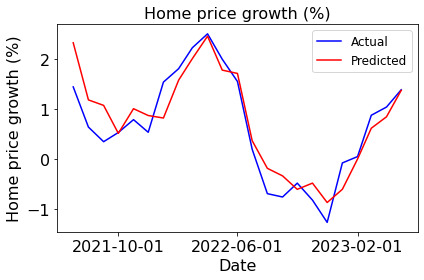

In [12]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2021, 10, 1), datetime(2022, 6, 1), datetime(2023, 2, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/XGBoost.eps', format='eps')
plt.show()

## Predictions when keeping the seasonality

In [13]:
error = pd.read_csv('XGBoost/errors_nsa.csv')
print(error)

    Unnamed: 0  n_estimators  max_depths       MSE      RMSE       MAE  \
0            0            10           5  0.000473  0.021749  0.019699   
1            0            10          10  0.000473  0.021749  0.019699   
2            0            10          15  0.000473  0.021749  0.019699   
3            0            10          20  0.000473  0.021749  0.019699   
4            0            10          25  0.000473  0.021749  0.019699   
5            0            20           5  0.000060  0.007720  0.006179   
6            0            20          10  0.000060  0.007721  0.006124   
7            0            20          15  0.000060  0.007721  0.006124   
8            0            20          20  0.000060  0.007721  0.006124   
9            0            20          25  0.000060  0.007721  0.006124   
10           0            50           5  0.000054  0.007356  0.005902   
11           0            50          10  0.000054  0.007335  0.005826   
12           0            50          

We get the best results for n_estimator = 100 and max_depth = 10. Let us plot the predictions.

In [19]:
features_nsa = [('sales_raw', 1),
                ('inventory_raw', 2),
                ('new_listings_raw', 5),
                ('mean_days_to_pending_raw', 1),
                ('mean_sale_to_list_ratio_raw', 2),
                ('median_days_to_pending_raw', 1),
                ('median_sale_to_list_ratio_raw', 2),
                ('newly_pending_listings_raw', 1),
                ('pct_listings_price_cut_raw', 2),
                ('pct_sold_above_list_price_raw', 2),
                ('pct_sold_below_list_price_raw', 2)]

In [20]:
(y, y_hat) = backtest(features_nsa, 100, 10, ds_begin, ds_end, 36, False)

In [21]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)

Text(0.5, 1.0, 'Non seasonally adjusted ensemble model')

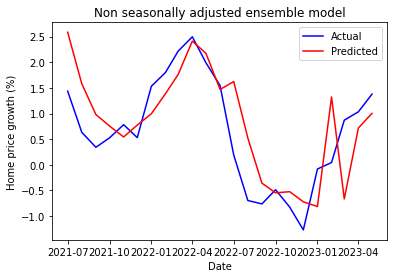

In [22]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted ensemble model')